# DLC annotator tutorial
Please check this [example](https://github.com/DeepLabCut/DeepLabCut/blob/master/examples/JUPYTER/Demo_yourowndata.ipynb) and this [one](https://github.com/DeepLabCut/DeepLabCut/blob/master/examples/JUPYTER/Demo_labeledexample_MouseReaching.ipynb) for more info on this.
The DLC workshop on [GitHub](https://github.com/DeepLabCut/DeepLabCut-Workshop-Materials/blob/master/DLCcourse.md#the-basics-of-computing-in-python-terminal-and-overview-of-dlc) may also provide all the information you may require.
This is a notebook intended for my personal use, as I am getting to know and experiment with DLC.

## Import modules:

In [1]:
%load_ext autoreload
%autoreload 2

import deeplabcut
import os
from dlc_utils import *

## Create a project and configuration path:

In [2]:
mice_id = find_videos(r'C:\Users\jhflc\Documents\Projects\KI_article', extension='.avi')
print(mice_id)
vid_paths = get_paths(['blackfly_375529_2021-07-25_7_VIDEO.avi'],r'C:\Users\jhflc\Documents\Projects\KI_article\data')
print(vid_paths)

{'375529': 'blackfly_375529_2021-07-25_7_VIDEO.avi'}
['C:\\Users\\jhflc\\Documents\\Projects\\KI_article\\data\\375529_7\\blackfly_375529_2021-07-25_7_VIDEO.avi']


In [3]:
task='POSE' # Enter the name of your experiment Task
experimenter='JoaoCampagnolo' # Enter the name of the experimenter
video=['C:\\Users\\jhflc\\Documents\\Projects\\KI_article\\data\\375529_7\\blackfly_375529_2021-07-25_7_VIDEO.avi'] # Enter the paths of your videos OR FOLDER you want to grab frames from.

path_config_file=deeplabcut.create_new_project(task,experimenter,video,copy_videos=True)
# NOTE: The function returns the path, where your project is.

Created "C:\Users\jhflc\Documents\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\videos"
Created "C:\Users\jhflc\Documents\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\labeled-data"
Created "C:\Users\jhflc\Documents\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\training-datasets"
Created "C:\Users\jhflc\Documents\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\dlc-models"
Copying the videos
C:\Users\jhflc\Documents\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\videos\blackfly_375529_2021-07-25_7_VIDEO.avi
Generated "C:\Users\jhflc\Documents\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\config.yaml"

A new project with name POSE-JoaoCampagnolo-2021-12-13 is created at C:\Users\jhflc\Documents\Projects\KI_article\scripts and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extrac

### Or use pre-existing project

In [11]:
# Note that parameters of this project can be seen at: *Reaching-Mackenzie-2018-08-30/config.yaml*
from pathlib import Path

#create a variable to set the config.yaml file path:
path_config_file = os.path.join(os.getcwd(),
                                'C:\\Users\\jhflc\\OneDrive\\Documentos\\Projects\\KI_article\\scripts\\POSE-JoaoCampagnolo-2021-12-13\\config.yaml')
print(path_config_file)

C:\Users\jhflc\OneDrive\Documentos\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\config.yaml


## Extract fames from the videos

"A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) ('uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling."

In [4]:
%matplotlib inline
#there are other ways to grab frames, such as uniformly; please see the paper:

#AUTOMATIC:
deeplabcut.extract_frames(path_config_file)

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\jhflc\Documents\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-09\videos\blackfly_375529_2021-07-25_7_VIDEO.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1481.5  seconds.
Extracting and downsampling... 44445  frames from the video.


44445it [01:32, 483.07it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


In [ ]:
#AND/OR:
#SELECT RARE EVENTS MANUALLY:
%gui wx
deeplabcut.extract_frames(path_config_file,'manual')

Quitting for now!


## Label the extracted frames

"Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling."

In [ ]:
%gui wx
deeplabcut.label_frames(path_config_file)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


## Check the labels

"Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check_labels' to do so. It is used as follows:"

In [3]:
deeplabcut.check_labels(path_config_file, draw_skeleton=True) #this creates a subdirectory with the frames + your labels

Creating images with labels by JoaoCampagnolo.


100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [00:04<00:00, 19.09it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


## Create training dataset

"This function generates the training data information for network training based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles if they want to benchmark the performance (typcailly, 1 is what you will set, so you pass nothing!).

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**. For most all use cases we have seen, the defaults are perfectly fine.

Now it is the time to start training the network!"

In [4]:
deeplabcut.create_training_dataset(path_config_file)
#remember, there are several networks you can pick, the default is resnet-50! Other types: resnet_101, resnet_152, 
#mobilenet_v2_1.0, mobilenet_v2_0.75, mobilenet_v2_0.5, mobilenet_v2_0.35, efficientnet-b0, efficientnet-b1, 
#efficientnet-b2, efficientnet-b3, efficientnet-b4, efficientnet-b5, and efficientnet-b6.

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.9,
  1,
  (array([31,  4,  0, 75, 34, 20, 52, 39, 63, 67, 50, 84, 42, 78, 83, 61,  3,
          18, 86, 25, 77, 79, 32, 72, 35,  5, 54, 68, 88, 24, 19, 71, 91, 12,
          87, 66,  2, 11, 26, 28, 44, 37, 40, 65, 48, 49, 64, 10, 85,  9, 82,
          27, 15, 74, 90, 51, 43, 41, 69, 45, 46, 17, 55, 89, 38, 59,  6, 56,
          60, 53, 29, 47, 76, 70, 57, 36, 13, 62, 21,  7, 73, 92,  1]),
   array([30, 22, 14, 33, 81, 80, 23, 58, 16,  8])))]

## Training the model

"This function trains the network for a specific shuffle of the training dataset. The user can set various parameters in /Reaching-Mackenzie-2018-08-30/dlc-models/ReachingAug30-trainset95shuffle1/iteration-0/train/pose_cfg.yaml.

Training can be stopped at any time. Note that the weights are only stored every 'save_iters' steps. For this demo the it is advisable to store & display the progress very often (i.e. display every 20, save every 100). In practice this is inefficient (in reality, you will train until ~200K, so we save every 50K).

**We recommend just training for 10-20 min, as you aren't running this demo to use DLC, just to work through the steps. In total, this demo should take you LESS THAN 1 HOUR!**"

In [ ]:
deeplabcut.train_network(path_config_file, shuffle=1, maxiters=200000, saveiters=50000, displayiters=10000)
#notice the variables "saveiters" and "dsiplayiters" that can be set in the function

#you just need to run this until you get at least 1 snapshot, which is set by: "save_iters" 
#(so in this case you could stop after 500!) How do I stop? Click the STOP button!
# To train until ~2,000 iterations on a CPU should be ~30 min

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['snout', 'left_ear', 'right_ear', 'midspine', 'tail'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'clahe': True,
 'claheratio': 0.1,
 'crop_pad': 0,
 'crop_sampling': 'hybrid',
 'crop_size': [400, 400],
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-1\\UnaugmentedDataSet_POSEDec9\\POSE_JoaoCampagnolo90shuffle1.mat',
 'dataset_type': 'default',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'edge': False,
 'emboss': {'alpha': [0.0, 1.0], 'embossratio': 0.1, 'strength': [0.5, 1.5]},
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'histeq': True,
 'histeqratio': 0.1,
 'init_weights': 'C:\\Users\\jhflc\\anaconda3\\envs\\DEEPLABCUT\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref

Selecting single-animal trainer
Batch Size is 1


C:\Users\jhflc\anaconda3\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 200000
Display_iters overwritten as 10000
Save_iters overwritten as 50000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\jhflc\\Documents\\Projects\\KI_article\\scripts\\POSE-JoaoCampagnolo-2021-12-13\\dlc-models\\iteration-1\\POSEDec9-trainset90shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'default', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': 

iteration: 10000 loss: 0.0118 lr: 0.005
iteration: 20000 loss: 0.0073 lr: 0.02
iteration: 30000 loss: 0.0052 lr: 0.02
iteration: 40000 loss: 0.0046 lr: 0.02
iteration: 50000 loss: 0.0041 lr: 0.02
iteration: 60000 loss: 0.0039 lr: 0.02
iteration: 70000 loss: 0.0038 lr: 0.02
iteration: 80000 loss: 0.0036 lr: 0.02
iteration: 90000 loss: 0.0036 lr: 0.02
iteration: 100000 loss: 0.0034 lr: 0.02


## Evaluate the model

"This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images) and stores the results as .csv file in a subdirectory under **evaluation-results**"

In [12]:
snap_file = 'C:\\Users\\jhflc\\OneDrive\\Documentos\\Projects\\KI_article\\scripts\\POSE-JoaoCampagnolo-2021-12-13\\dlc-models\iteration-1\\POSEDec9-trainset90shuffle1\\train\\snapshot-100000.meta'
deeplabcut.evaluate_network(path_config_file, plotting=True)

Running  DLC_resnet50_POSEDec9shuffle1_100000  with # of training iterations: 100000


C:\Users\jhflc\anaconda3\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Running evaluation ...


93it [00:46,  1.99it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-100000
Results for 100000  training iterations: 90 1 train error: 1.61 pixels. Test error: 2.34  pixels.
With pcutoff of 0.9  train error: 1.61 pixels. Test error: 2.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [00:21<00:00,  4.28it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


## Analyze the videos

"This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. The pose array (pose vs. frame index) can also be exported as csv file (set flag to...)

*NOTE: Yes, this is slow on a CPU (a GPU is MUCH faster)... see https://www.biorxiv.org/content/early/2018/10/30/457242 if you are interested!*"

In [13]:
# Set the video path:
# The video can be the one you trained with and new videos that look similar, i.e. same experiments, etc.
# You can add individual videos, OR just a folder - it will skip videos that are already analyzed once.

videofile_path = 'C:\\Users\\jhflc\\OneDrive\\Documentos\\Projects\\KI_article\\scripts\\POSE-JoaoCampagnolo-2021-12-13\\videos\\blackfly_375529_2021-07-25_7_VIDEO.avi' 
#videofile_path = ['videos/video3.avi','videos/video4.avi'] #Enter a folder OR a list of videos to analyze.

deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='.avi')

Using snapshot-100000 for model C:\Users\jhflc\OneDrive\Documentos\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\dlc-models\iteration-1\POSEDec9-trainset90shuffle1
Starting to analyze %  C:\Users\jhflc\OneDrive\Documentos\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\videos\blackfly_375529_2021-07-25_7_VIDEO.avi
Loading  C:\Users\jhflc\OneDrive\Documentos\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\videos\blackfly_375529_2021-07-25_7_VIDEO.avi
Duration of video [s]:  1481.5 , recorded with  30.0 fps!
Overall # of frames:  44445  found with (before cropping) frame dimensions:  448 448
Starting to extract posture


44844it [7:13:40,  1.72it/s]                                                                                           


Saving results in C:\Users\jhflc\OneDrive\Documentos\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_POSEDec9shuffle1_100000'

## Extract outlier frames [optional step]

"This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. This step has many options, so please look at:"

In [8]:
deeplabcut.extract_outlier_frames?

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,['/videos/video3.avi']) #pass a specific video

## Refine Labels [optional step]

"Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset."

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

"**NOTE**: Afterwards, if you want to look at the adjusted frames, you can load them in the main GUI by running: deeplabcut.label_frames(path_config_file)

(you can add a new "cell" below to add this code!)

#### Once all folders are relabeled, check the labels again! If you are not happy, adjust them in the main GUI:
<code>deeplabcut.label_frames(path_config_file)</code>

Check Labels:

<code>deeplabcut.check_labels(path_config_file)</code>"

In [ ]:
#NOW, merge this with your original data:
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset [optional step]

"Following the refinement of labels and appending them to the original dataset, this creates a new iteration of training dataset. This is automatically set in the config.yaml file, so let's get training!"

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

## Create labeled video

"This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides.

THIS HAS MANY FUN OPTIONS!

<code>deeplabcut.create_labeled_video(config, videos, videotype='avi', shuffle=1, trainingsetindex=0, filtered=False, save_frames=False, Frames2plot=None, delete=False, displayedbodyparts='all', codec='mp4v', outputframerate=None, destfolder=None, draw_skeleton=False, trailpoints=0, displaycropped=False)</code>

So please check: <code>deeplabcut.create_labeled_video?</code> "

In [14]:
deeplabcut.create_labeled_video(path_config_file, [videofile_path], draw_skeleton=False)

## Plot the trajectories of the analyzed videos

"This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color."

Loading  C:\Users\jhflc\OneDrive\Documentos\Projects\KI_article\scripts\POSE-JoaoCampagnolo-2021-12-13\videos\blackfly_375529_2021-07-25_7_VIDEO.avi and data.


<IPython.core.display.Javascript object>


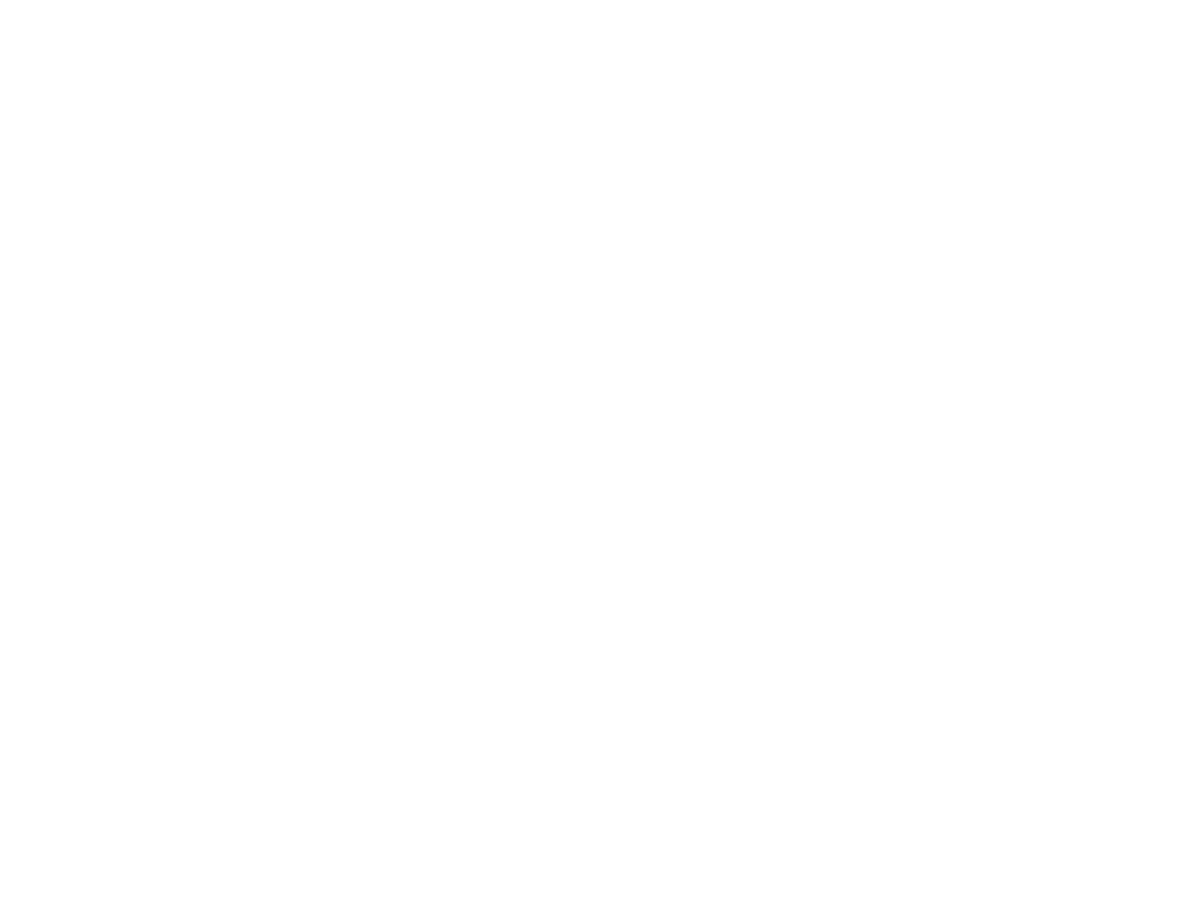

<IPython.core.display.Javascript object>


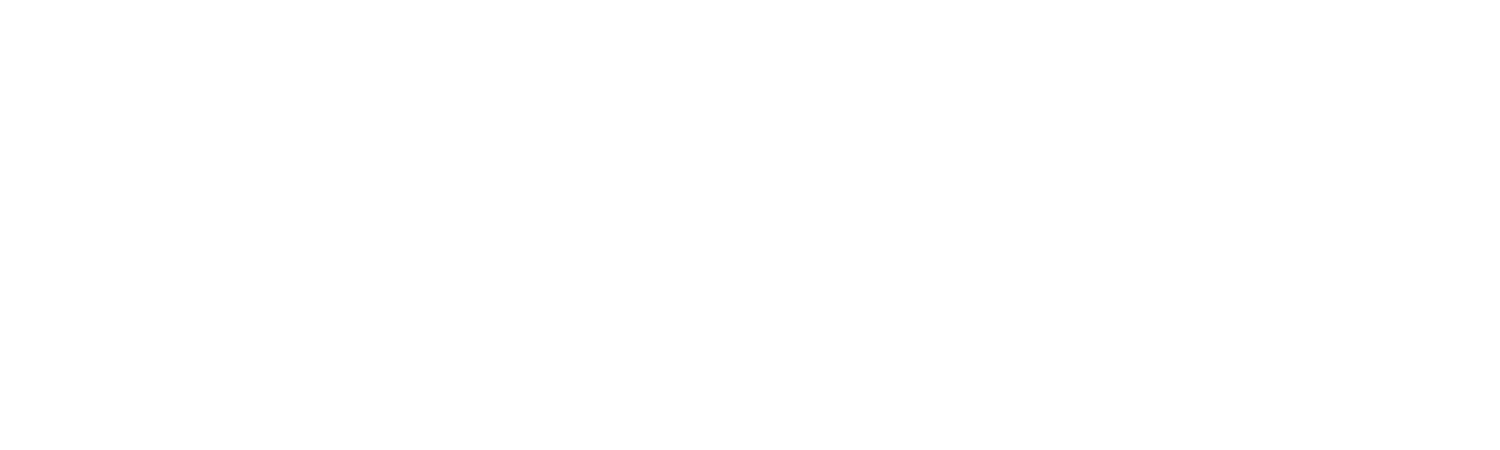

<IPython.core.display.Javascript object>


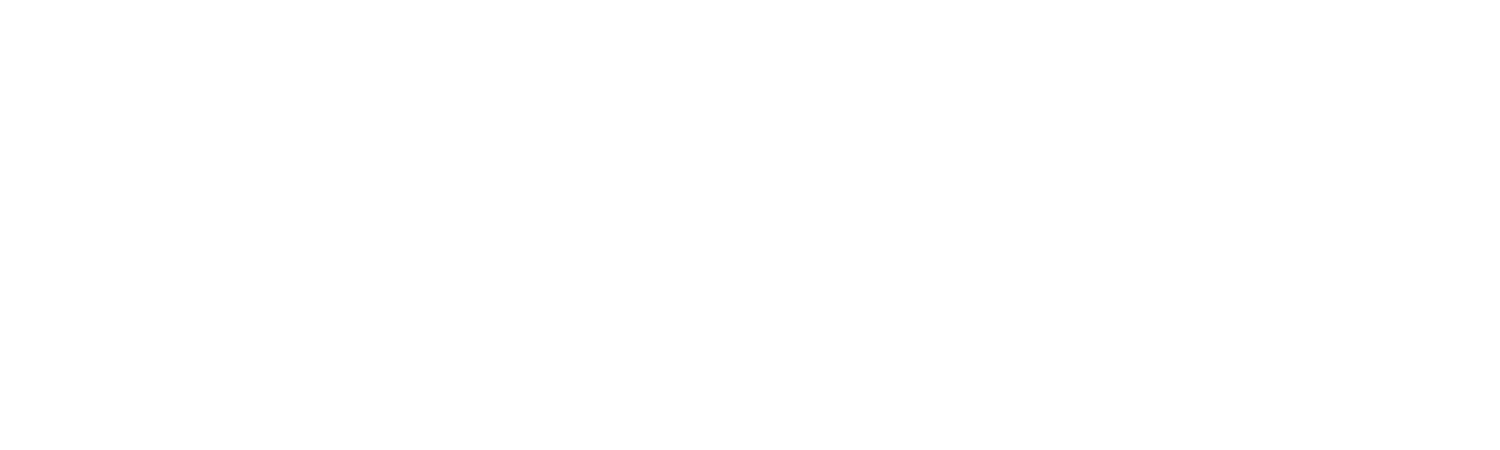

<IPython.core.display.Javascript object>


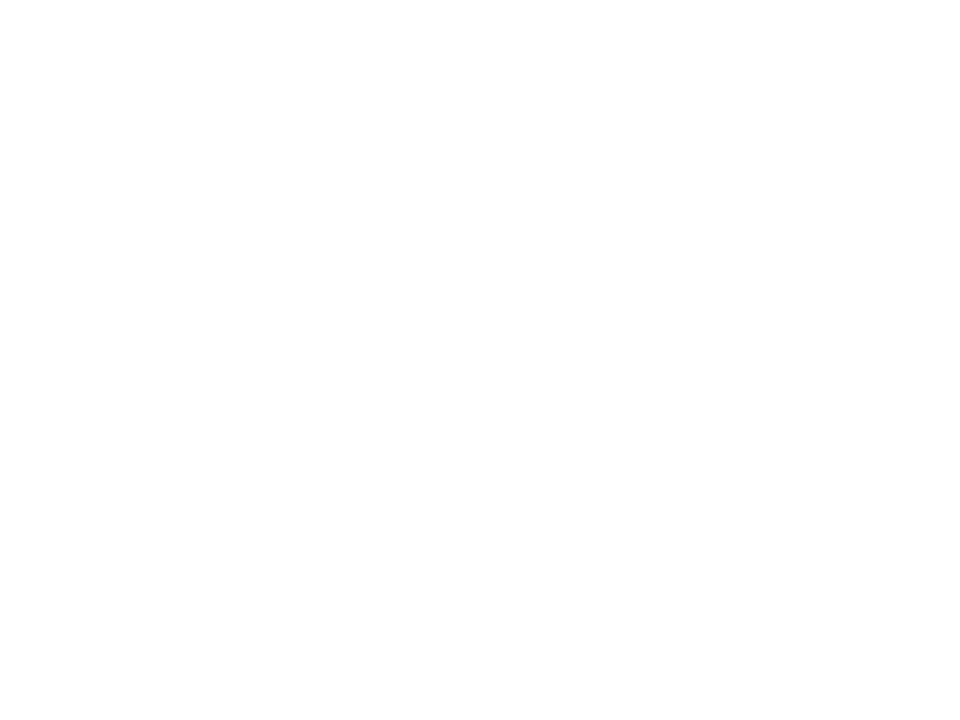

Plots created! Please check the directory "plot-poses" within the video directory


In [15]:
%matplotlib notebook 
#for making interactive plots.
deeplabcut.plot_trajectories(path_config_file, [videofile_path])